# `Ali Almalki`

# 🛠 02. Neural network classification with TensorFlow Exercises
1. Play with neural networks in the [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.07072&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false) for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?
2. Replicate the model pictured in the  [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true)
 below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. Try this network out for yourself on the TensorFlow Playground website. Hint: there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data.
3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.
4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.
5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.
6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. 

#### 1. Play with neural networks in the TensorFlow Playground for 10-minutes. Especially try different values of the learning, what happens when you decrease it? What happens when you increase it?

 `My observation`

- After experimenting with TensorFlow Playground for a classification problem I noticed that when increasing the learning rate the neural network training and testing loss increases which is not good for the neural netowrk to learn patterns in the data effectively. 

- Smaller learning rates need more training epochs because of the smaller changes made in each weight update. On the other hand, higher learning rates result in fast changes and require fewer training epochs.

- The default learning rate `0.001` for the Adam optimisation algorithm works very well in most scenarios. However, it's possible to change the learning rate depending on the problem and evaluate each learning rate value and their effect on the model's performance.



In [1]:
# Default learning rate for Adam optimiser 
1e-3

0.001

2. Replicate the model pictured in the  [TensorFlow Playground diagram](https://playground.tensorflow.org/#activation=relu&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.001&regularizationRate=0&noise=0&networkShape=6,6,6,6,6&seed=0.51287&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false&regularization_hide=true&discretize_hide=true&regularizationRate_hide=true&percTrainData_hide=true&dataset_hide=true&problem_hide=true&noise_hide=true&batchSize_hide=true)
 below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. Try this network out for yourself on the TensorFlow Playground website. `Hint:` there are 5 hidden layers but the output layer isn't pictured, you'll have to decide what the output layer should be based on the input data. 


#### Import Required Libraries

In [37]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import itertools
from sklearn.datasets import make_moons
from sklearn.metrics import confusion_matrix

![Model in TensorFlow Playground](https://drive.google.com/uc?id=1xJ5Yomt27MMlqKPEL_ALRpfjMuzw6MML)

In [3]:
# Set a random seed for reproducibility
tf.random.set_seed(42)

# Create a model 
model = tf.keras.Sequential([
   tf.keras.layers.Flatten(input_shape=(2, 1)),# Input Layer
   tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer 1
   tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer 2
   tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer 3
   tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer 4
   tf.keras.layers.Dense(6, activation='relu'), # Hidden Layer 5
   tf.keras.layers.Dense(1, activation='sigmoid'), # Output Layer
])

# Compile the model 
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])


In [4]:
# Check a summary of the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 2)                 0         
                                                                 
 dense (Dense)               (None, 6)                 18        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 6)                 42        
                                                                 
 dense_3 (Dense)             (None, 6)                 42        
                                                                 
 dense_4 (Dense)             (None, 6)                 42        
                                                                 
 dense_5 (Dense)             (None, 1)                 7

3. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.

In [5]:
X, y = make_moons(n_samples=5000, noise=0.1)
print(X)
print(y)

[[-0.15908805  1.14941055]
 [-0.05925703  0.38478272]
 [-0.29599105  0.88686876]
 ...
 [ 0.8063654  -0.68138503]
 [ 0.77767289 -0.39519   ]
 [-0.54441897  0.72454783]]
[0 1 0 ... 1 1 0]


In [6]:
print(f'X feature variables has {len(X)} samples')
print(f'y target variable has {len(y)} samples')
print(f'y target variable has {len(np.unique(y))} classes which are {np.unique(y)}')

X feature variables has 5000 samples
y target variable has 5000 samples
y target variable has 2 classes which are [0 1]


In [7]:
# Check data features
X

array([[-0.15908805,  1.14941055],
       [-0.05925703,  0.38478272],
       [-0.29599105,  0.88686876],
       ...,
       [ 0.8063654 , -0.68138503],
       [ 0.77767289, -0.39519   ],
       [-0.54441897,  0.72454783]])

In [8]:
# Check data labels
y

array([0, 1, 0, ..., 1, 1, 0])

In [9]:
X[:,0]

array([-0.15908805, -0.05925703, -0.29599105, ...,  0.8063654 ,
        0.77767289, -0.54441897])

In [10]:
X[:,1]

array([ 1.14941055,  0.38478272,  0.88686876, ..., -0.68138503,
       -0.39519   ,  0.72454783])

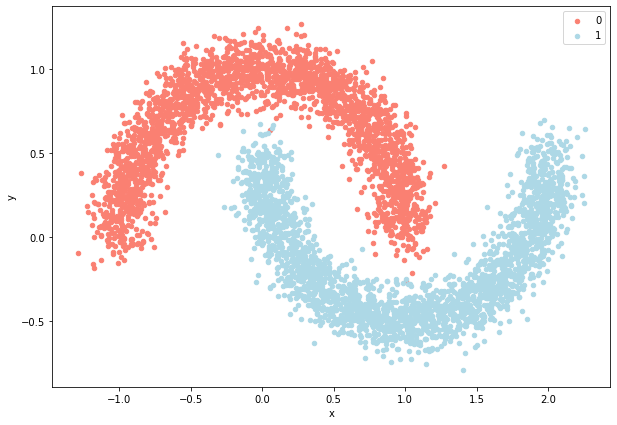

In [11]:
# Visualise make_moons dataset
df = pd.DataFrame(dict(x=X[:,0], y=X[:,1], label=y))
colors = {0:'salmon', 1:'lightblue'}
fig, ax = plt.subplots(figsize=(10, 7))
grouped = df.groupby('label')
for key, group in grouped:
  group.plot(ax=ax, kind='scatter', x='x', y='y', label=key, color=colors[key])

plt.show()

In [12]:
len(X), len(y)

(5000, 5000)

In [13]:
# Split the data into training and testing sets
xtrain = X[:3000]
ytrain = y[:3000]
xtest = X[3000:]
ytest = y[3000:]

len(xtrain), len(ytrain), len(xtest), len(ytest)

(3000, 3000, 2000, 2000)

In [24]:
# Build a model to fit it at over 85% accuracy

# Set a random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model 
model = tf.keras.Sequential([
  tf.keras.layers.Dense(100), # 100 dense neurons
  tf.keras.layers.Dense(10, activation='relu'), # add another layer with 10 neurons
  tf.keras.layers.Dense(1, activation='sigmoid') # Output Layer
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
model.fit(xtrain, ytrain, epochs=10) # fit for 10 passes of the data

# 4. Evaluate the model 
model.evaluate(xtest, ytest)

Epoch 1/10
94/94 [==============================] - 1s 4ms/step - loss: 0.4432 - accuracy: 0.8393
Epoch 2/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2745 - accuracy: 0.8787
Epoch 3/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2380 - accuracy: 0.8843
Epoch 4/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2202 - accuracy: 0.8933
Epoch 5/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2175 - accuracy: 0.8907
Epoch 6/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2130 - accuracy: 0.8967
Epoch 7/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2127 - accuracy: 0.8923
Epoch 8/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2159 - accuracy: 0.8953
Epoch 9/10
94/94 [==============================] - 0s 4ms/step - loss: 0.2106 - accuracy: 0.8947
Epoch 10/10
63/63 [==============================] - 0s 3ms/step - loss: 0.2168 - accuracy: 0.8890


[0.2167784422636032, 0.8889999985694885]

In [131]:
# Creating a function to visualise model performance
def show_decision_boundary(model, X, y):
  """
  This function plots the decision boundary created by a model predicting on X features.

  Arguments: 
    model --> the trained model 
    X --> the feature data 
    y --> the truth labels 

  Returns:
    A visualisation of how our model is performing.
    
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values  to predict on all of them
  x_in = np.c_[xx.ravel(), yy.ravel()] 
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print('Multiclass classification.')
    # Reshape predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print('Binary classification.')
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())

Binary classification.


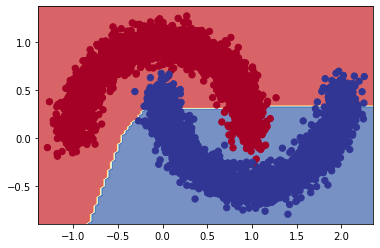

In [132]:
# Visualise model performance
show_decision_boundary(model , X , y)

4. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.

In [28]:
# Read the fashion MNIST dataset 

fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [29]:
# Check the data type
type(train_images), type(train_labels)

(numpy.ndarray, numpy.ndarray)

In [30]:
# Check the set shape
print(f'Training data: ', train_images.shape)
print(f'Training labels: ', train_labels.shape)
print(f'Testing data: ', test_images.shape)
print(f'Training labels: ', test_labels.shape)

Training data:  (60000, 28, 28)
Training labels:  (60000,)
Testing data:  (10000, 28, 28)
Training labels:  (10000,)


In [31]:
train_images[0], len(train_images[0])

(array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
           0,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
           0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
           1,   0],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
           0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
           0,   3],
        [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
           0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
          10

In [32]:
# Unique label classes
np.unique(train_labels)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [33]:
# Set class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

Label classes ranging from 0 to 9 represents:

![Fashion MNIST Classes](https://drive.google.com/uc?id=1wi20x_GM_x2EgB3syCfVev-XIIz2wRD5)




In [34]:
train_labels[0]

9

In [35]:
# Train a model to get 88%+ accuracy on the fashion MNIST test set.

# Set a random seed for reproducibility
tf.random.set_seed(42)

# 1. Create a model 
mnist_model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), # Input Layer (28 * 28 = 784 pixels)
  tf.keras.layers.Dense(100, activation='relu'), # Hidden Layer to learn patterns/weights 
  tf.keras.layers.Dense(100, activation='relu'), # Hidden Layer to learn patterns/weights 
  tf.keras.layers.Dense(100, activation='relu'), # Hidden Layer to learn patterns/weights 
  tf.keras.layers.Dense(100, activation='relu'), # Hidden Layer to learn patterns/weights
  tf.keras.layers.Dense(100, activation='relu'), # Hidden Layer to learn patterns/weights  
  tf.keras.layers.Dense(10, activation='softmax') # Output Layer (10 classes) - Softmax for multi class classification
])

# 2. Compile the model
mnist_model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# 3. Fit the model
history = mnist_model.fit(train_images, train_labels, epochs=80) # fit for 80 passes of the data

# 4. Evaluate the model 
mnist_model.evaluate(test_images, test_labels)


Epoch 1/80
1875/1875 [==============================] - 7s 3ms/step - loss: 0.7728 - accuracy: 0.7751
Epoch 2/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4647 - accuracy: 0.8334
Epoch 3/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4255 - accuracy: 0.8482
Epoch 4/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3954 - accuracy: 0.8587
Epoch 5/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3771 - accuracy: 0.8652
Epoch 6/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3577 - accuracy: 0.8711
Epoch 7/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3524 - accuracy: 0.8727
Epoch 8/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3410 - accuracy: 0.8771
Epoch 9/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3300 - accuracy: 0.8802
Epoch 10/80
1875/1875 [==============================] - 6s 3ms/step - loss: 0.326

[0.6073784232139587, 0.8823000192642212]

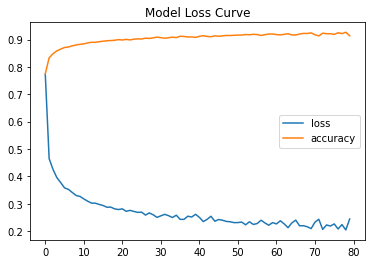

In [36]:
# Plot model loss curve
pd.DataFrame(history.history).plot(title='Model Loss Curve');

#### Create Custom Confusion Matrix Function

In [49]:
def plot_cm(y_true, y_pred, classes=None, figsize=(15, 15), text_size=10): 
  """
  This function plots a labelled confusion matrix comparing predictions and ground truth labels.

  Arguments:
    y_true: Array of truth labels (must be same shape as y_pred).
    y_pred: Array of predicted labels (must be same shape as y_true).
    classes: Array of class labels (e.g. string form). If `None`, integer labels are used.
    figsize: Size of output figure (default=(10, 10)).
    text_size: Size of output figure text (default=15).
  
  Returns:
    A labelled confusion matrix plot comparing y_true and y_pred.

  Example usage:
    make_confusion_matrix(y_true=test_labels, # Ground truth test labels
                          y_pred=y_preds, # Predicted labels
                          classes=class_names, # Array of class label names
                          figsize=(10, 7),
                          text_size=10)
  """  
  # Create the confustion matrix
  cm = confusion_matrix(y_true, y_pred)
  cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalise it
  n_classes = cm.shape[0] # find the number of classes 

  # Plot the figure 
  fig, ax = plt.subplots(figsize=figsize)
  cax = ax.matshow(cm, cmap=plt.cm.Greens) # Correct predictions classes will have darker colour
  fig.colorbar(cax)

  # Are there a list of classes?
  if classes:
    labels = classes
  else:
    labels = np.arange(cm.shape[0])
  
  # Label the axes
  ax.set(title='Confusion Matrix',
         xlabel='Predicted label',
         ylabel='True label',
         xticks=np.arange(n_classes), 
         yticks=np.arange(n_classes), 
         xticklabels=labels, # axes will labeled with class names 
         yticklabels=labels)
  
  # Make x-axis labels appear on bottom
  ax.xaxis.set_label_position('bottom')
  ax.xaxis.tick_bottom()

  # Set the threshold for different colors
  threshold = (cm.max() + cm.min()) / 2.

  # Plot the text on each cell
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
             horizontalalignment='center',
             color='white' if cm[i, j] > threshold else 'black',
             size=text_size)

In [39]:
# Make predictions 
y_pred = mnist_model.predict(test_images)
y_pred

array([[9.3218470e-24, 1.3509522e-28, 6.7983699e-32, ..., 1.0708125e-05,
        3.0583355e-23, 9.9998927e-01],
       [3.9660274e-05, 5.6289884e-10, 9.9974352e-01, ..., 1.2993036e-30,
        1.4268420e-12, 4.2169570e-28],
       [1.5453432e-29, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7971912e-05, 1.2930275e-12, 5.0284030e-12, ..., 0.0000000e+00,
        9.9998105e-01, 0.0000000e+00],
       [1.5793060e-30, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1829327e-37, 0.0000000e+00, 0.0000000e+00, ..., 3.5998929e-07,
        2.0573985e-26, 2.4881249e-06]], dtype=float32)

In [42]:
# Converting predictions probabilities into predictions of classes (0-9)
predictions = y_pred.argmax(axis = 1)

In [43]:
# Check predictions
predictions[:5]

array([9, 2, 1, 1, 6])

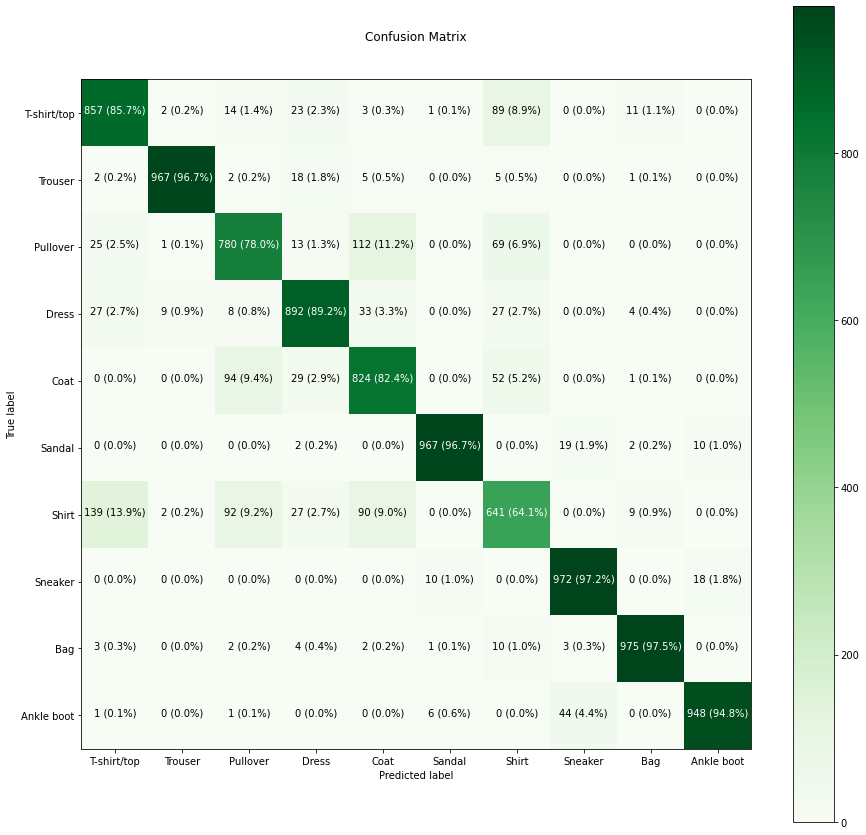

In [50]:
# Plot a confusion matrix to evaluate mnist_model performance
plot_cm(y_true = test_labels , 
                      y_pred = predictions , 
                      classes = class_names)

5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.

In [51]:
# Create an input tensor for the softmax function
tensor = tf.constant([[9, 10, 5, 2],
                     [0, 8, 7, 3],
                     [1, 4, 6, 5],
                      [6, 3, 9, 1],
                      [2, 8, 4, 0]] )
tensor

<tf.Tensor: shape=(5, 4), dtype=int32, numpy=
array([[ 9, 10,  5,  2],
       [ 0,  8,  7,  3],
       [ 1,  4,  6,  5],
       [ 6,  3,  9,  1],
       [ 2,  8,  4,  0]], dtype=int32)>

In [53]:
# Apply TensorFlow Softmax Function
output = tf.keras.activations.softmax(tf.cast(tensor, dtype=tf.float64))
tf.reduce_max(output), tf.reduce_min(output) # Max and min should be 1 and 0 after applying softmax function

(<tf.Tensor: shape=(), dtype=float64, numpy=0.9793073783741816>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.00024398118648774747>)

**Softmax Function Mathematical Formula**
![Softmax Function](https://drive.google.com/uc?id=1LEu5-sK4xJH2F9Qscn6hm64Exyig9Wik)




In [54]:
# Write softmax activation function in my own code
def softmax(input):
  """
  This function takes an input tensor and converts it to a probability distribution between 1s and 0s.
  """
  e_input = tf.math.exp(input - tf.math.reduce_max(input))
  return e_input / tf.math.reduce_sum(e_input, axis=0)


In [59]:
my_softmax_tensor = softmax(tf.cast(tensor, dtype=tf.float64)) 
my_softmax_tensor

<tf.Tensor: shape=(5, 4), dtype=float64, numpy=
array([[9.51331930e-01, 7.84891652e-01, 1.51346910e-02, 4.11403556e-02],
       [1.17403687e-04, 1.06223534e-01, 1.11831081e-01, 1.11831081e-01],
       [3.19136309e-04, 1.94555189e-03, 4.11403556e-02, 8.26326131e-01],
       [4.73640278e-02, 7.15728542e-04, 8.26326131e-01, 1.51346910e-02],
       [8.67502430e-04, 1.06223534e-01, 5.56774167e-03, 5.56774167e-03]])>

In [60]:
tf.reduce_max(my_softmax_tensor), tf.reduce_min(my_softmax_tensor) # Max and min should be 1 and 0 after applying softmax function

(<tf.Tensor: shape=(), dtype=float64, numpy=0.9513319297469331>,
 <tf.Tensor: shape=(), dtype=float64, numpy=0.0001174036870714718>)

6. Create a function (or write code) to visualize multiple image predictions for the fashion MNIST at the same time. Plot at least three different images and their prediciton labels at the same time. 

In [80]:
# Make predictions
predictions = mnist_model.predict(test_images)
predictions

array([[9.3218470e-24, 1.3509522e-28, 6.7983699e-32, ..., 1.0708125e-05,
        3.0583355e-23, 9.9998927e-01],
       [3.9660274e-05, 5.6289884e-10, 9.9974352e-01, ..., 1.2993036e-30,
        1.4268420e-12, 4.2169570e-28],
       [1.5453432e-29, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       ...,
       [1.7971912e-05, 1.2930275e-12, 5.0284030e-12, ..., 0.0000000e+00,
        9.9998105e-01, 0.0000000e+00],
       [1.5793060e-30, 1.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00],
       [1.1829327e-37, 0.0000000e+00, 0.0000000e+00, ..., 3.5998929e-07,
        2.0573985e-26, 2.4881249e-06]], dtype=float32)

In [84]:
# Create a function to to visualise multiple image predictions 
def plot_image(i, predictions_array, true_label, img):
  """

  This function plots multiple image predictions with their labels 
  to check with ground truth labels.

  """

  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'

  plt.xlabel('{} {:2.0f}% ({})'.format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('green')

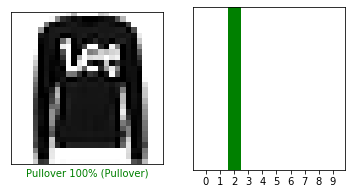

In [95]:
# Check a sample prediction
i = 1
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

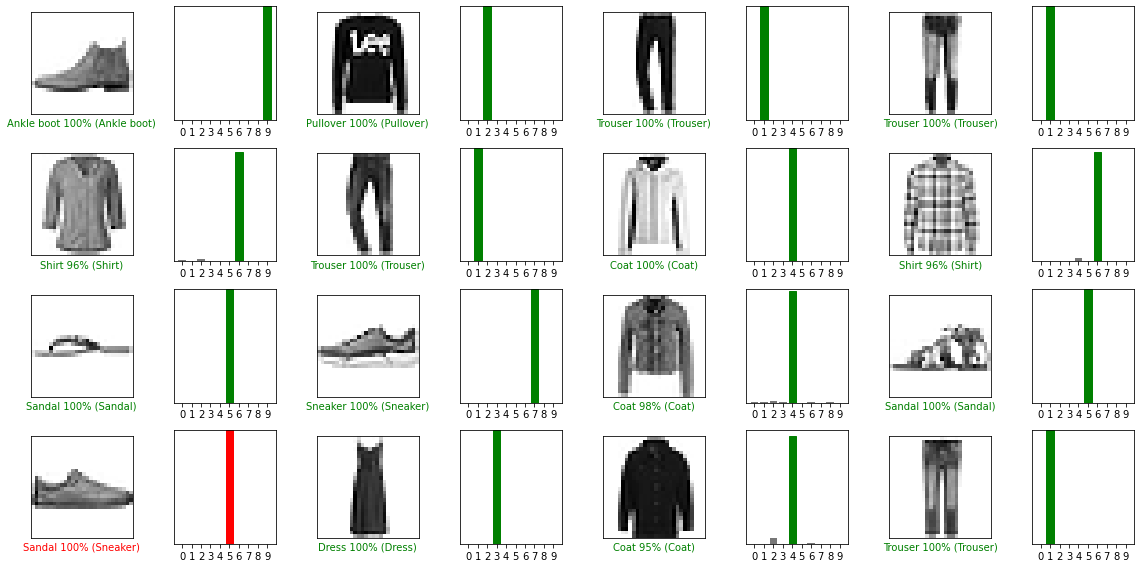

In [99]:
# Visualise multiple image predictions with their labels
num_rows = 4
num_cols = 4
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

### References: 

* [TensorFlow Documentation](https://www.tensorflow.org/api_docs/python/tf/all_symbols)

* [TensorFlow Playground](https://playground.tensorflow.org/#activation=tanh&batchSize=10&dataset=circle&regDataset=reg-plane&learningRate=0.03&regularizationRate=0&noise=0&networkShape=4,2&seed=0.07072&showTestData=false&discretize=false&percTrainData=50&x=true&y=true&xTimesY=false&xSquared=false&ySquared=false&cosX=false&sinX=false&cosY=false&sinY=false&collectStats=false&problem=classification&initZero=false&hideText=false)

* [Impact of Learning Rate on Neural Network Performance](https://machinelearningmastery.com/understand-the-dynamics-of-learning-rate-on-deep-learning-neural-networks/)

* [Stack 2D arrays](https://numpy.org/devdocs/reference/generated/numpy.c_.html)

* [Colormaps in Matplotlib](https://matplotlib.org/stable/tutorials/colors/colormaps.html)

* [Keras Sequential API](https://www.tensorflow.org/api_docs/python/tf/keras/Sequential)

* [Adam Optimiser](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam)

* [Fashion MNIST](https://www.tensorflow.org/tutorials/keras/classification)

* [Softmax Function](https://www.tensorflow.org/api_docs/python/tf/keras/activations/softmax)

* [Exercise Source](https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/README.md#-02-neural-network-classification-with-tensorflow-exercises)
